In [1]:
%load_ext autoreload
%autoreload 2

# MLflow Classification Recipe Notebook

This notebook runs the MLflow Classification Recipe and inspects its results. For more information about the MLflow Classification Recipe, including usage examples, see the [Classification Recipe overview documentation](https://mlflow.org/docs/latest/recipes.html#classification-recipe) the [Classification Recipe API documentation](https://mlflow.org/docs/latest/python_api/mlflow.recipes.html#module-mlflow.recipes.classification.v1.recipe).

In [2]:
from mlflow.recipes import Recipe

r = Recipe(profile="local")

2024/11/17 07:17:20 INFO mlflow.recipes.recipe: Creating MLflow Recipe 'mlflow_recipes' with profile: 'local'


In [3]:
r.clean()

In [4]:
r.inspect()

In [5]:
r.run("ingest")

2024/11/17 07:17:21 INFO mlflow.recipes.step: Running step ingest...




Loading dataset CSV using `pandas.read_csv()` with default arguments and assumed index column 0 which may not produce the desired schema. If the schema is not correct, you can adjust it by modifying the `load_file_as_dataframe()` function in `steps/ingest.py`
Loading dataset CSV using `pandas.read_csv()` with default arguments and assumed index column 0 which may not produce the desired schema. If the schema is not correct, you can adjust it by modifying the `load_file_as_dataframe()` function in `steps/ingest.py`


name,type
fixed acidity,number
volatile acidity,number
citric acid,number
residual sugar,number
chlorides,number
free sulfur dioxide,number
total sulfur dioxide,number
density,number
pH,number
sulphates,number


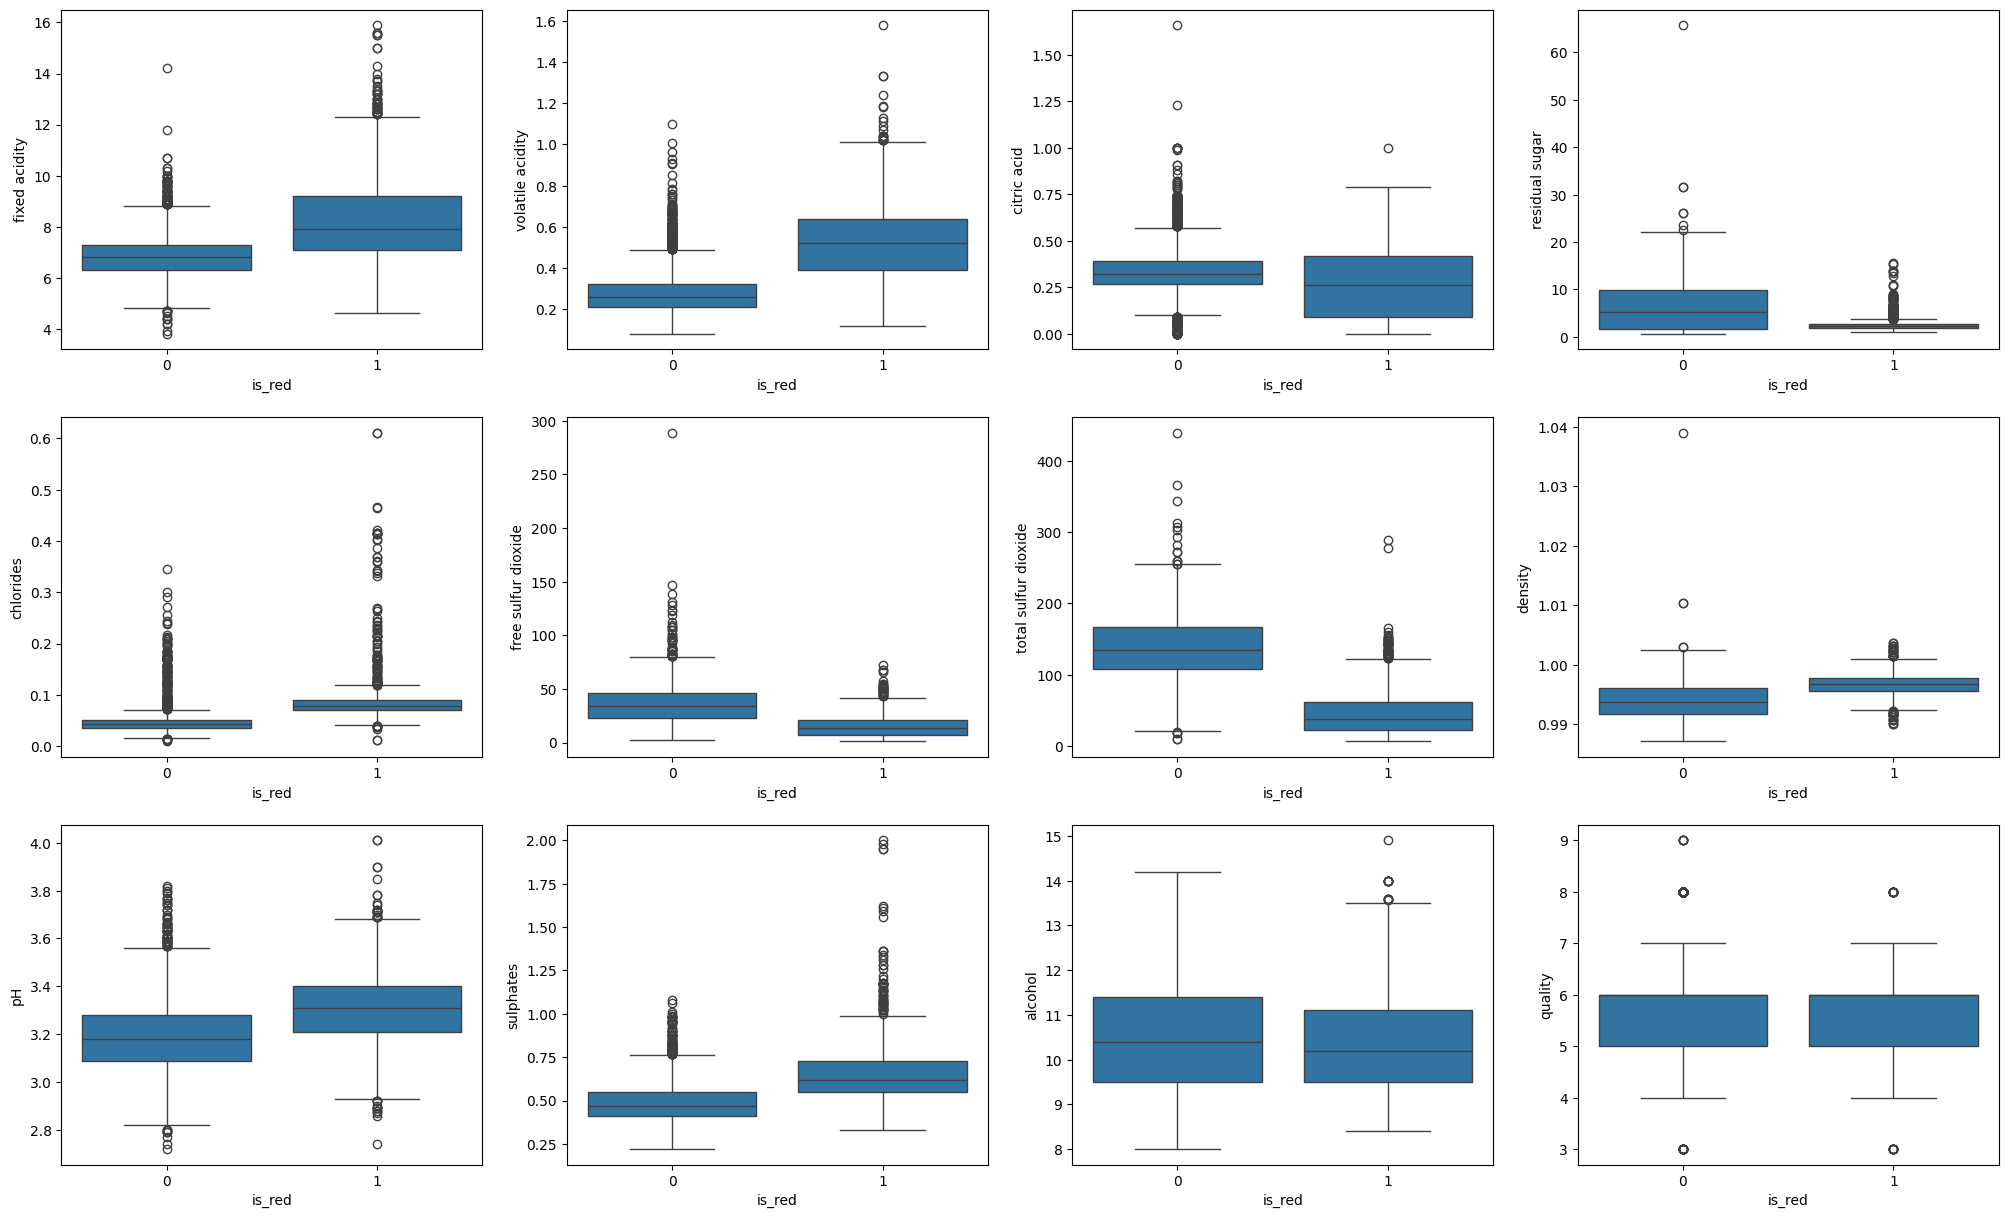

In [6]:
# Perform some EDA on the ingested dataset.
import matplotlib.pyplot as plt
import seaborn as sns

ingested_data = r.get_artifact("ingested_data")

dims = (3, 4)

f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in ingested_data.columns:
    if col == "is_red":
        continue  # Box plots cannot be used on indicator variables
    sns.boxplot(
        x=ingested_data["is_red"], y=ingested_data[col], ax=axes[axis_i, axis_j]
    )
    axis_j += 1
    if axis_j == dims[1]:
        axis_i += 1
        axis_j = 0

In [7]:
r.run("split")

2024/11/17 07:17:23 INFO mlflow.recipes.utils.execution: ingest: No changes. Skipping.


Run MLflow Recipe step: split
2024/11/17 07:17:23 INFO mlflow.recipes.step: Running step split...
/Users/ariefrahmansyah/src/github.com/ariefrahmansyah/mlops-llmops-mlflow/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
r.run("transform")

2024/11/17 07:17:24 INFO mlflow.recipes.utils.execution: ingest, split: No changes. Skipping.


Run MLflow Recipe step: transform
2024/11/17 07:17:25 INFO mlflow.recipes.step: Running step transform...


Name,Type
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [9]:
r.run("train")

2024/11/17 07:17:26 INFO mlflow.recipes.utils.execution: ingest, split, transform: No changes. Skipping.


Run MLflow Recipe step: train
2024/11/17 07:17:26 INFO mlflow.recipes.step: Running step train...
2024/11/17 07:17:27 INFO mlflow.recipes.utils.tracking: Experiment with name 'sklearn_classification_experiment' does not exist. Creating a new experiment.
2024/11/17 07:17:27 INFO mlflow.recipes.steps.train: Detected class imbalance: minority class percentage is 0.25
2024/11/17 07:17:27 INFO mlflow.recipes.steps.train: After downsampling: minority class percentage is 0.30
2024/11/17 07:17:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2024/11/17 07:17:29 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/17 07:17:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2024/11/17 07:17:30 WARNING mlflow.models.model: Model 

Metric,training,validation
f1_score,0.8968,0.893617
accuracy_score,0.940553,0.950413
example_count,4340,605
false_negatives,181,20
false_positives,77,10
precision_score,0.935726,0.926471
recall_score,0.860983,0.863014
score,0.940553,0.950413
true_negatives,2961,449
true_positives,1121,126


In [10]:
r.run("evaluate")

2024/11/17 07:17:35 INFO mlflow.recipes.utils.execution: ingest, split, transform, train: No changes. Skipping.


Run MLflow Recipe step: evaluate
2024/11/17 07:17:35 INFO mlflow.recipes.step: Running step evaluate...
2024/11/17 07:17:36 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
2024/11/17 07:17:36 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dataset, positive label is 1, negative label is 0.
2024/11/17 07:17:37 INFO mlflow.models.evaluation.default_evaluator: Testing metrics on first row...
2024/11/17 07:17:37 WARNING mlflow.models.evaluation.default_evaluator: SHAP or matplotlib package is not installed, so model explainability insights will not be logged.
2024/11/17 07:17:37 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
2024/11/17 07:17:37 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dataset, positive label is 1, negative label is 0.
2024/11/17 07:17:37 INFO mlflow.models.evaluation.default_evaluator: Testing metrics on first row..

Metric,validation,test
f1_score,0.893617,0.879195
accuracy_score,0.950413,0.941748
example_count,605,618.000000
false_negatives,20,20.000000
false_positives,10,16.000000
precision_score,0.926471,0.891156
recall_score,0.863014,0.867550
score,0.950413,0.941748
true_negatives,449,451.000000
true_positives,126,131.000000


In [11]:
r.run("register")

2024/11/17 07:17:37 INFO mlflow.recipes.utils.execution: ingest, split, transform, train, evaluate: No changes. Skipping.


Run MLflow Recipe step: register
2024/11/17 07:17:38 INFO mlflow.recipes.step: Running step register...
Successfully registered model 'red_wine_classifier'.
2024/11/17 07:17:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: red_wine_classifier, version 1
Created version '1' of model 'red_wine_classifier'.


In [12]:
r.inspect("train")

Metric,training,validation
f1_score,0.8968,0.893617
accuracy_score,0.940553,0.950413
example_count,4340,605
false_negatives,181,20
false_positives,77,10
precision_score,0.935726,0.926471
recall_score,0.860983,0.863014
score,0.940553,0.950413
true_negatives,2961,449
true_positives,1121,126


In [13]:
training_data = r.get_artifact("training_data")
training_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000,5274.000000
mean,7.215520,0.341091,0.317869,5.499270,0.056097,30.556219,115.929750,0.994712,3.218466,0.531083,10.498774,5.825370,0.246871
std,1.277315,0.165753,0.143888,4.798543,0.035201,17.859117,56.780264,0.003020,0.160984,0.149387,1.197846,0.872072,0.431232
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992352,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.410000,0.390000,8.200000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.600000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.200000,9.000000,1.000000


In [14]:
trained_model = r.get_artifact("model")
print(trained_model)

mlflow.pyfunc.loaded_model:
  artifact_path: train/model
  flavor: mlflow.pyfunc.model
  run_id: 3dbb28699e2b483398d885337f1866f8

